In [15]:
# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alicexu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
# Load news from CSV file
file_path = Path("../house_loan_project/house_news.csv")
news_df = pd.read_csv(file_path, encoding="utf-8-sig")
news_df.head()

,title,description,text,date,language
0,Australia's big banks hike fixed-rate home loa...,Two of Australia's biggest home lenders jacked...,"SYDNEY, June 30 (Reuters) - Two of Australia's...",2022-06-30,en
1,Wealth inequality in Australia and the rapid r...,A report launched today by UNSW Sydney and Aus...,A report launched today by UNSW Sydney and Aus...,2022-07-22,en
2,Australia news live updates: house prices dip;...,New data shows two in five properties in Austr...,"Good morning,\r\nTwo in five properties in Aus...",2022-07-22,en
3,The Nordstrom Anniversary Sale Is Back—and The...,"Save on top brands like UGG, The North Face, a...",This article contains affiliate links to produ...,2022-07-15,en
4,"Australia news live: Covid mask warnings, foot...",Anthony Albanese says he hopes there will be n...,Agriculture minister urges travellers to be wa...,2022-07-20,en


In [18]:
# Fetch house news
house_df = news_df[news_df["language"] == "en"]
house_df.head()

,title,description,text,date,language
0,Australia's big banks hike fixed-rate home loa...,Two of Australia's biggest home lenders jacked...,"SYDNEY, June 30 (Reuters) - Two of Australia's...",2022-06-30,en
1,Wealth inequality in Australia and the rapid r...,A report launched today by UNSW Sydney and Aus...,A report launched today by UNSW Sydney and Aus...,2022-07-22,en
2,Australia news live updates: house prices dip;...,New data shows two in five properties in Austr...,"Good morning,\r\nTwo in five properties in Aus...",2022-07-22,en
3,The Nordstrom Anniversary Sale Is Back—and The...,"Save on top brands like UGG, The North Face, a...",This article contains affiliate links to produ...,2022-07-15,en
4,"Australia news live: Covid mask warnings, foot...",Anthony Albanese says he hopes there will be n...,Agriculture minister urges travellers to be wa...,2022-07-20,en


In [19]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [20]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in house_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
house_df = house_df.join(title_sentiment_df).join(text_sentiment_df)

house_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Australia's big banks hike fixed-rate home loa...,Two of Australia's biggest home lenders jacked...,"SYDNEY, June 30 (Reuters) - Two of Australia's...",2022-06-30,en,0.4588,0.214,0.786,0.000,1,-0.2960,0.000,0.934,0.066,-1
1,Wealth inequality in Australia and the rapid r...,A report launched today by UNSW Sydney and Aus...,A report launched today by UNSW Sydney and Aus...,2022-07-22,en,0.4939,0.242,0.758,0.000,1,-0.4215,0.044,0.858,0.098,-1
2,Australia news live updates: house prices dip;...,New data shows two in five properties in Austr...,"Good morning,\r\nTwo in five properties in Aus...",2022-07-22,en,0.4939,0.158,0.842,0.000,1,0.5859,0.121,0.879,0.000,1
3,The Nordstrom Anniversary Sale Is Back—and The...,"Save on top brands like UGG, The North Face, a...",This article contains affiliate links to produ...,2022-07-15,en,0.5994,0.274,0.647,0.080,1,0.5106,0.093,0.907,0.000,1
4,"Australia news live: Covid mask warnings, foot...",Anthony Albanese says he hopes there will be n...,Agriculture minister urges travellers to be wa...,2022-07-20,en,-0.6808,0.000,0.588,0.412,-1,-0.5267,0.000,0.892,0.108,-1


<AxesSubplot:title={'center':'News Title and Text Sentiment Comparisson'}>

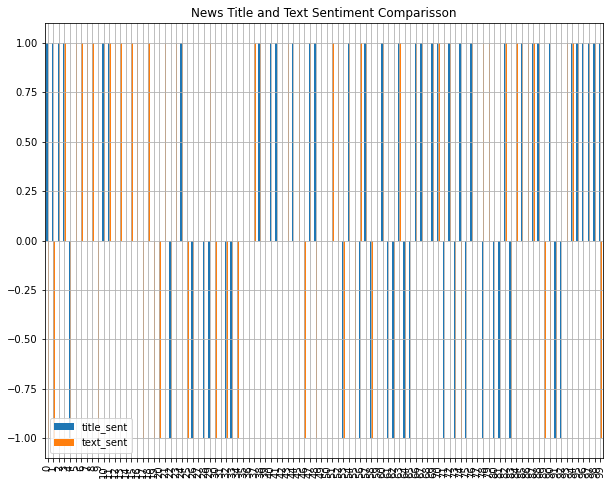

In [22]:
 # Plot bar chart
house_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [29]:
# Describe dataframe
house_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000
mean,0.072306,0.097420,0.838610,0.063970,0.120000,0.138919,0.074530,0.884250,0.04121,0.21000
std,0.392668,0.144327,0.166927,0.124322,0.755853,0.451019,0.075807,0.088477,0.05942,0.85629
min,-0.807400,0.000000,0.420000,0.000000,-1.000000,-0.865800,0.000000,0.591000,0.00000,-1.00000
25%,0.000000,0.000000,0.707750,0.000000,0.000000,-0.128000,0.000000,0.826750,0.00000,-1.00000
50%,0.000000,0.000000,0.857000,0.000000,0.000000,0.012900,0.068000,0.892000,0.00000,0.00000
75%,0.296000,0.190750,1.000000,0.048750,1.000000,0.511950,0.121750,0.942000,0.06600,1.00000
max,0.936000,0.536000,1.000000,0.549000,1.000000,0.916600,0.281000,1.000000,0.23400,1.00000


([<matplotlib.patches.Wedge at 0x7fe5cc57d590>,
 [Text(1.0800968559509565, 0.20830454091271944, 'Title_compound'),
  Text(0.8837960681063588, 0.6549080164418057, 'Title_pos'),
  Text(-1.0992253698286185, 0.04127452392380894, 'Title_neu'),
  Text(0.7656460038536437, -0.789801365396988, 'Title_neg'),
  Text(1.0454710678610144, -0.3420383695808857, 'Title_sent')])

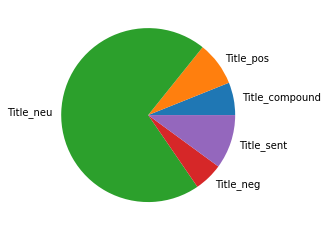

In [33]:
import matplotlib.pyplot as plt
title_sent_df = pd.DataFrame({
    "Types":['Title_compound','Title_pos', 'Title_neu', 'Title_neg', 'Title_sent'], "Mean Data":[0.072306, 0.097420, 0.838610, 0.063970, 0.12]
})
plt.pie(title_sent_df["Mean Data"], labels = title_sent_df["Types"])

([<matplotlib.patches.Wedge at 0x7fe5cc628a50>,
 [Text(1.0429272712681577, 0.34971803906169197, 'Text_compound'),
  Text(0.749911748849499, 0.8047560928240843, 'Text_pos'),
  Text(-1.0957488594333462, 0.0966148904182007, 'Text_neu'),
  Text(0.5241250817482384, -0.9671054227344622, 'Text_neg'),
  Text(0.971038021984273, -0.5168028249350719, 'Text_sent')])

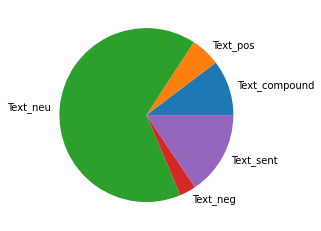

In [36]:
text_sent_df = pd.DataFrame({
    "Types": ['Text_compound', 'Text_pos', 'Text_neu', 'Text_neg', 'Text_sent'], "Mean Data": [0.138919, 0.074530, 0.884250, 0.04121, 0.21000]
})
plt.pie(text_sent_df["Mean Data"], labels = text_sent_df["Types"])